# Fashion MNIST Dataset

## 1.LeNet-5 Architecture

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


C:\Users\mraja\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7112 - loss: 0.8151 - val_accuracy: 0.8533 - val_loss: 0.4079
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8591 - loss: 0.3834 - val_accuracy: 0.8654 - val_loss: 0.3673
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8792 - loss: 0.3320 - val_accuracy: 0.8813 - val_loss: 0.3292
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8889 - loss: 0.3041 - val_accuracy: 0.8860 - val_loss: 0.3178
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8966 - loss: 0.2833 - val_accuracy: 0.8938 - val_loss: 0.2960
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9034 - loss: 0.2639 - val_accuracy: 0.8897 - val_loss: 0.3065
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9072 - loss: 0.2495 - val_accuracy: 0.9001 - val_loss: 0.2782
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9161 - loss: 0.2321 - val

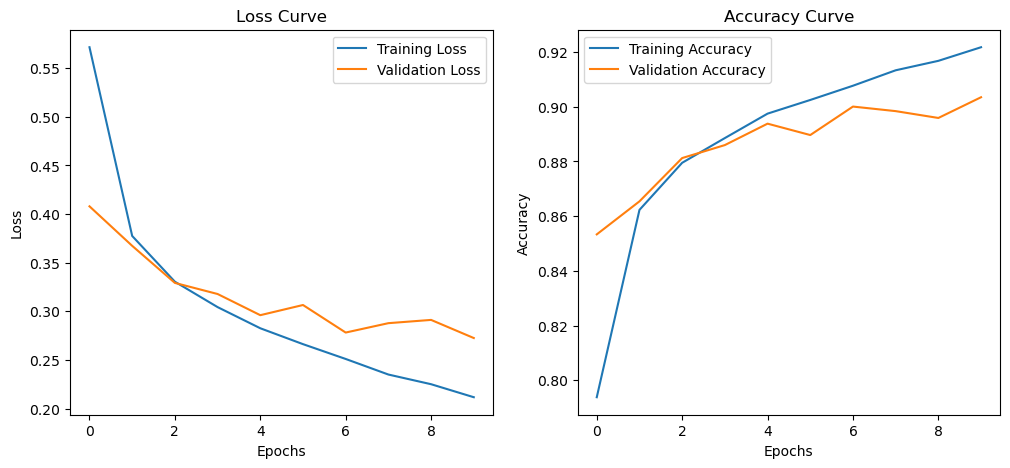

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Load FashionMNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize images to range [0,1] and reshape for CNN
train_images = train_images.reshape((60000, 28, 28, 1)).astype("float32") / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype("float32") / 255.0

# Convert labels to one-hot encoding
train_labels_cat = to_categorical(train_labels, 10)
test_labels_cat = to_categorical(test_labels, 10)

# Define LeNet-5 architecture
def LeNet5():
    model = Sequential([
        Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1), padding="same"),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        Conv2D(16, kernel_size=(5, 5), activation='tanh', padding="valid"),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        Flatten(),
        Dense(120, activation='tanh'),
        Dense(84, activation='tanh'),
        Dense(10, activation='softmax')
    ])
    return model

# Compile and train the LeNet-5 model
model = LeNet5()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels_cat, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels_cat, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

# Compute Classification Metrics
precision = precision_score(test_labels, pred_labels, average='macro')
recall = recall_score(test_labels, pred_labels, average='macro')
f1 = f1_score(test_labels, pred_labels, average='macro')

print("\nClassification Report:")
print(classification_report(test_labels, pred_labels))

# Plot Loss and Accuracy Curves
plt.figure(figsize=(12, 5))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.show()


## 2.AlexNet Architecture

C:\Users\mraja\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 409s 1s/step - accuracy: 0.5623 - loss: 1.1020 - val_accuracy: 0.8425 - val_loss: 0.4388
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 417s 1s/step - accuracy: 0.8519 - loss: 0.4030 - val_accuracy: 0.8609 - val_loss: 0.3787
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 918s 2s/step - accuracy: 0.8714 - loss: 0.3489 - val_accuracy: 0.8797 - val_loss: 0.3453
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 412s 1s/step - accuracy: 0.8851 - loss: 0.3116 - val_accuracy: 0.8925 - val_loss: 0.3040
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 430s 1s/step - accuracy: 0.8953 - loss: 0.2841 - val_accuracy: 0.8783 - val_loss: 0.3183
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 268s 716ms/step - accuracy: 0.9032 - loss: 0.2605 - val_accuracy: 0.8964 - val_loss: 0.2875
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 267s 713ms/step - accuracy: 0.9080 - loss: 0.2429 - val_accuracy: 0.8852 - val_loss: 0.3099
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 268s 714ms/step - accuracy: 0.9177 - loss: 0.2300 -

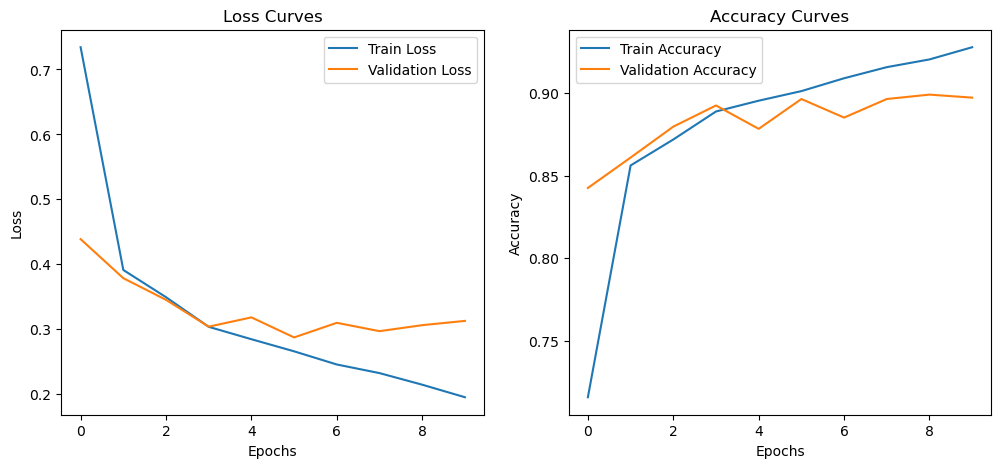

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

# Define the AlexNet architecture
def AlexNet():
    model = Sequential([
        Conv2D(96, kernel_size=(11, 11), strides=1, activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        
        Conv2D(256, kernel_size=(5, 5), strides=1, activation='relu', padding="same"),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        
        Conv2D(384, kernel_size=(3, 3), strides=1, activation='relu', padding="same"),
        Conv2D(384, kernel_size=(3, 3), strides=1, activation='relu', padding="same"),
        Conv2D(256, kernel_size=(3, 3), strides=1, activation='relu', padding="same"),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Compile the model
model = AlexNet()
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_cat, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
predictions = model.predict(test_images)
pred_labels = predictions.argmax(axis=1)

# Calculate additional metrics
precision = precision_score(test_labels, pred_labels, average='macro')
recall = recall_score(test_labels, pred_labels, average='macro')
f1 = f1_score(test_labels, pred_labels, average='macro')

# Print the classification report
print("Classification Report:")
print(classification_report(test_labels, pred_labels))

# Save the results
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}

# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()


## 3.GoogleNet Architecture

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 723s 2s/step - accuracy: 0.4509 - loss: 1.3406 - val_accuracy: 0.7807 - val_loss: 0.6131
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 727s 2s/step - accuracy: 0.8238 - loss: 0.4917 - val_accuracy: 0.8668 - val_loss: 0.3683
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1948s 5s/step - accuracy: 0.8719 - loss: 0.3602 - val_accuracy: 0.8860 - val_loss: 0.3120
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 693s 2s/step - accuracy: 0.8886 - loss: 0.3072 - val_accuracy: 0.8612 - val_loss: 0.3763
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 675s 2s/step - accuracy: 0.8989 - loss: 0.2848 - val_accuracy: 0.8969 - val_loss: 0.3095
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1903s 5s/step - accuracy: 0.9108 - loss: 0.2520 - val_accuracy: 0.9004 - val_loss: 0.2892
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1100s 3s/step - accuracy: 0.9197 - loss: 0.2277 - val_accuracy: 0.9017 - val_loss: 0.2966
Epoch 9/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1668s 4s/step - accuracy: 0.9254 - loss: 0.2134 - val_

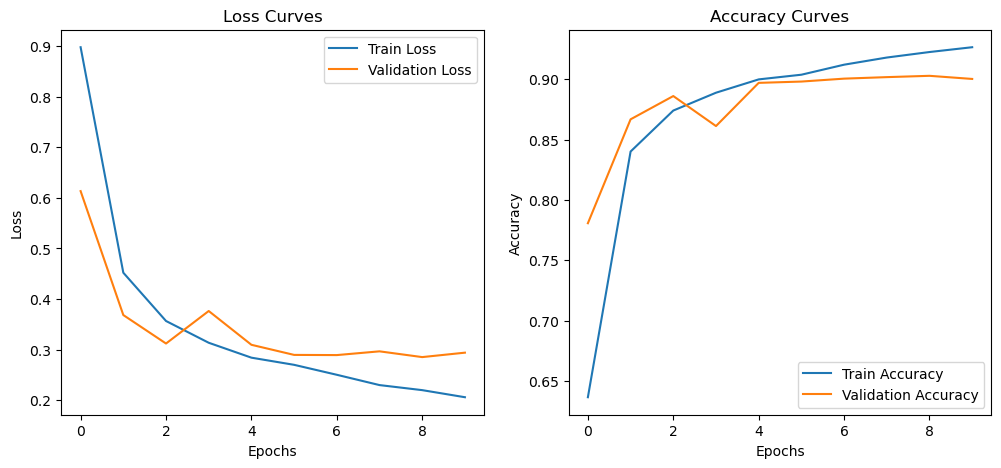

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, Input, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

# Define the Inception module
def inception_module(x, filters):
    conv1x1 = Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    conv3x3 = Conv2D(filters[1], (3, 3), padding='same', activation='relu')(x)
    conv5x5 = Conv2D(filters[2], (5, 5), padding='same', activation='relu')(x)
    pool_proj = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters[3], (1, 1), padding='same', activation='relu')(pool_proj)
    
    return concatenate([conv1x1, conv3x3, conv5x5, pool_proj], axis=-1)

# Define the GoogleNet architecture
def GoogleNet():
    input_layer = Input(shape=(28, 28, 1))
    
    x = Conv2D(64, (7, 7), strides=2, padding='same', activation='relu')(input_layer)
    x = MaxPooling2D((3, 3), strides=2, padding='same')(x)
    x = Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=2, padding='same')(x)
    
    x = inception_module(x, [64, 128, 32, 32])
    x = inception_module(x, [128, 192, 96, 64])
    x = MaxPooling2D((3, 3), strides=2, padding='same')(x)
    
    x = inception_module(x, [192, 208, 48, 64])
    x = inception_module(x, [160, 224, 64, 64])
    x = inception_module(x, [128, 256, 64, 64])
    x = inception_module(x, [112, 288, 64, 64])
    x = inception_module(x, [256, 320, 128, 128])
    x = MaxPooling2D((3, 3), strides=2, padding='same')(x)
    
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(10, activation='softmax')(x)
    
    model = Model(input_layer, x)
    return model

# Compile the model
model = GoogleNet()
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_cat, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
predictions = model.predict(test_images)
pred_labels = predictions.argmax(axis=1)

# Calculate additional metrics
precision = precision_score(test_labels, pred_labels, average='macro')
recall = recall_score(test_labels, pred_labels, average='macro')
f1 = f1_score(test_labels, pred_labels, average='macro')

# Print the classification report
print("Classification Report:")
print(classification_report(test_labels, pred_labels))

# Save the results
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}

# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()


## 4.VGGNet Architecture

C:\Users\mraja\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1080s 3s/step - accuracy: 0.6489 - loss: 0.9453 - val_accuracy: 0.8829 - val_loss: 0.3081
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 557s 1s/step - accuracy: 0.8827 - loss: 0.3266 - val_accuracy: 0.9036 - val_loss: 0.2639
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 797s 1s/step - accuracy: 0.9059 - loss: 0.2604 - val_accuracy: 0.9129 - val_loss: 0.2340
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1537s 4s/step - accuracy: 0.9191 - loss: 0.2217 - val_accuracy: 0.9210 - val_loss: 0.2165
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 564s 1s/step - accuracy: 0.9288 - loss: 0.1983 - val_accuracy: 0.9218 - val_loss: 0.2220
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 525s 1s/step - accuracy: 0.9390 - loss: 0.1691 - val_accuracy: 0.9216 - val_loss: 0.2208
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1403s 4s/step - accuracy: 0.9467 - loss: 0.1496 - val_accuracy: 0.9264 - val_loss: 0.2135
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 427s 987ms/step - accuracy: 0.9532 - loss: 0.1317 - va

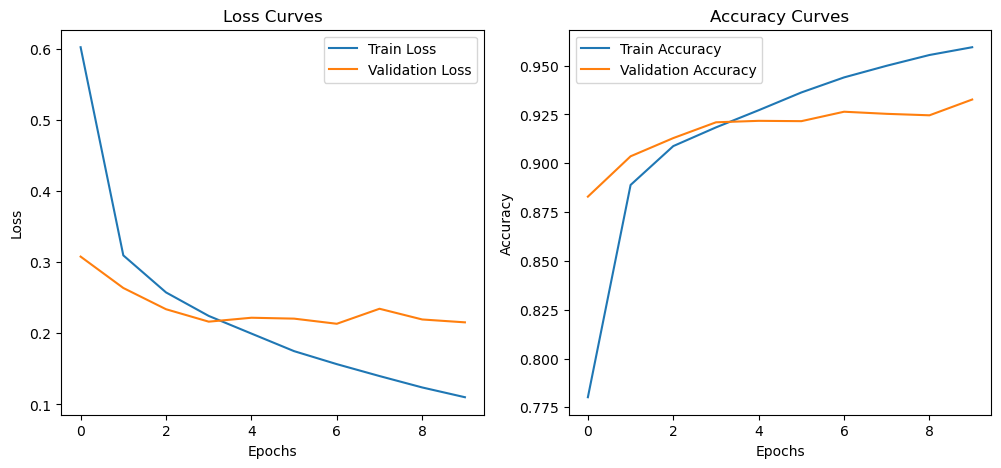

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

# Define the VGGNet-16 architecture
def VGGNet():
    model = Sequential([
        # Block 1
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=2),

        # Block 2
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=2),

        # Block 3
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=2),

        # Flatten and Fully Connected Layers
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # Output layer (10 classes)
    ])
    return model

# Compile the model
model = VGGNet()
model.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_cat, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
predictions = model.predict(test_images)
pred_labels = predictions.argmax(axis=1)

# Calculate additional metrics
precision = precision_score(test_labels, pred_labels, average='macro')
recall = recall_score(test_labels, pred_labels, average='macro')
f1 = f1_score(test_labels, pred_labels, average='macro')

# Print the classification report
print("Classification Report:")
print(classification_report(test_labels, pred_labels))

# Save the results
results = {
    'test_loss': test_loss,
    'test_accuracy': test_acc,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'history': history.history
}

# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()


## 5.ResNet Architecture

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1100s 3s/step - accuracy: 0.7725 - loss: 0.6432 - val_accuracy: 0.2333 - val_loss: 3.0881
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1426s 4s/step - accuracy: 0.8989 - loss: 0.2731 - val_accuracy: 0.8676 - val_loss: 0.3792
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1697s 5s/step - accuracy: 0.9239 - loss: 0.2122 - val_accuracy: 0.9078 - val_loss: 0.2591
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1701s 5s/step - accuracy: 0.9345 - loss: 0.1817 - val_accuracy: 0.8820 - val_loss: 0.3310
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1725s 5s/step - accuracy: 0.9441 - loss: 0.1583 - val_accuracy: 0.8524 - val_loss: 0.4938
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1264s 3s/step - accuracy: 0.9520 - loss: 0.1332 - val_accuracy: 0.8924 - val_loss: 0.3313
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1147s 3s/step - accuracy: 0.9595 - loss: 0.1152 - val_accuracy: 0.8917 - val_loss: 0.3660
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1144s 3s/step - accuracy: 0.9699 - loss: 0.0860 - 

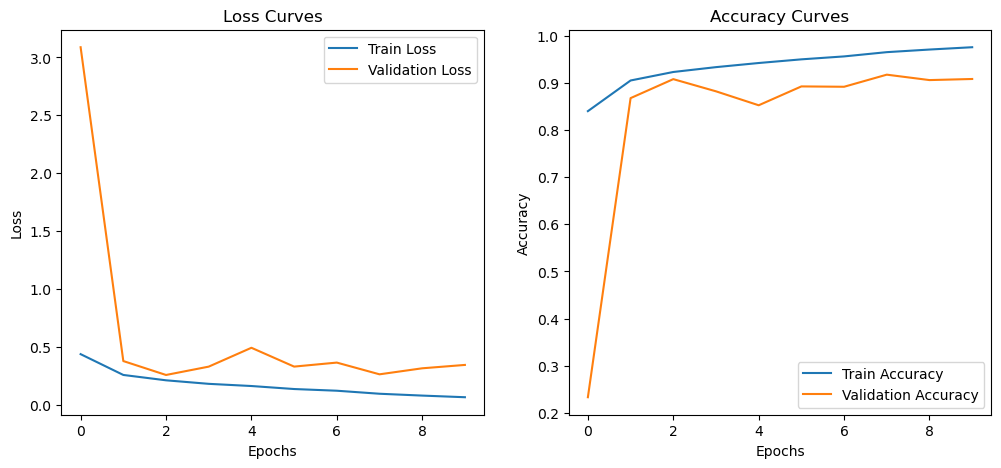

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D, Dense, Input

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

# Define a Residual Block with Shortcut Projection
def residual_block(x, filters, downsample=False):
    shortcut = x  # Store original input for skip connection

    # First Conv Layer
    x = Conv2D(filters, (3, 3), padding='same', strides=(2 if downsample else 1), activation=None)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Second Conv Layer
    x = Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    x = BatchNormalization()(x)

    # Adjust shortcut connection when downsampling or changing filter size
    if downsample or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=(2 if downsample else 1), padding='same', activation=None)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add shortcut connection
    x = Add()([x, shortcut])  
    x = ReLU()(x)
    return x

# Define the ResNet architecture
def ResNet():
    input_layer = Input(shape=(28, 28, 1))

    x = Conv2D(64, (3, 3), padding='same', activation=None)(input_layer)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Adding Residual Blocks with Downsampling
    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = residual_block(x, 128, downsample=True)
    x = residual_block(x, 128)

    x = residual_block(x, 256, downsample=True)
    x = residual_block(x, 256)

    # Global Average Pooling instead of Flattening
    x = GlobalAveragePooling2D()(x)
    x = Dense(10, activation='softmax')(x)  # Output layer (10 classes)

    model = Model(input_layer, x)
    return model

# Compile the model
model = ResNet()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_cat, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
predictions = model.predict(test_images)
pred_labels = predictions.argmax(axis=1)

# Calculate additional metrics
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
precision = precision_score(test_labels, pred_labels, average='macro')
recall = recall_score(test_labels, pred_labels, average='macro')
f1 = f1_score(test_labels, pred_labels, average='macro')

# Print the classification report
print("Classification Report:")
print(classification_report(test_labels, pred_labels))


# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()


## 6.Xception Architecture

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 164s 410ms/step - accuracy: 0.8064 - loss: 0.5465 - val_accuracy: 0.1445 - val_loss: 3.5535
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 152s 406ms/step - accuracy: 0.9013 - loss: 0.2687 - val_accuracy: 0.8432 - val_loss: 0.4431
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 149s 397ms/step - accuracy: 0.9195 - loss: 0.2167 - val_accuracy: 0.8808 - val_loss: 0.3411
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 152s 406ms/step - accuracy: 0.9314 - loss: 0.1814 - val_accuracy: 0.8890 - val_loss: 0.3155
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 152s 407ms/step - accuracy: 0.9448 - loss: 0.1485 - val_accuracy: 0.8928 - val_loss: 0.3226
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 195s 388ms/step - accuracy: 0.9478 - loss: 0.1366 - val_accuracy: 0.8807 - val_loss: 0.3682
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 150s 401ms/step - accuracy: 0.9601 - loss: 0.1103 - val_accuracy: 0.9028 - val_loss: 0.3120
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 148s 395ms/step - accuracy: 0.9649 -

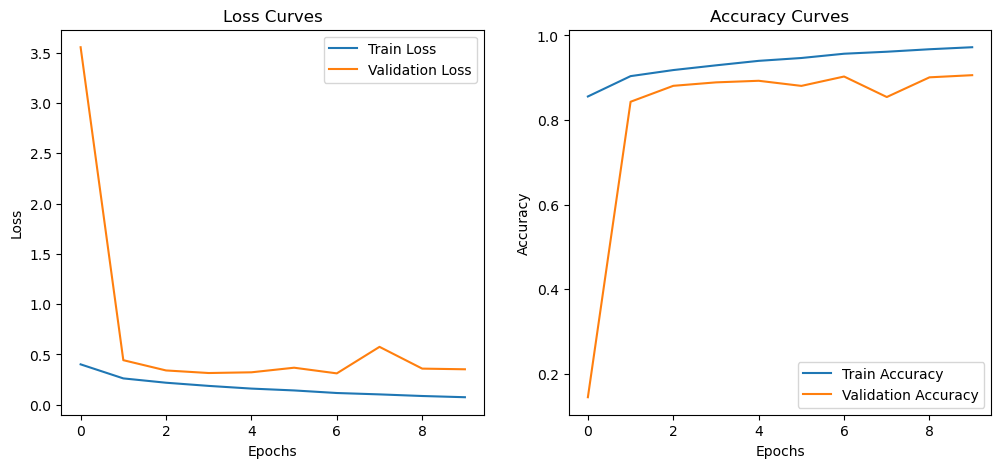

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (SeparableConv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D,
                                     Dense, Input, Conv2D, MaxPooling2D)

# Load and preprocess MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

# Separable Residual Block with Shortcut Projection
def separable_residual_block(x, filters, downsample=False):
    shortcut = x  # Save input for residual connection

    # First Depthwise Separable Convolution
    x = SeparableConv2D(filters, (3, 3), padding='same', strides=(2 if downsample else 1), activation=None)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Second Depthwise Separable Convolution
    x = SeparableConv2D(filters, (3, 3), padding='same', activation=None)(x)
    x = BatchNormalization()(x)

    # Adjust shortcut when downsampling or filter size changes
    if downsample or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=(2 if downsample else 1), padding='same', activation=None)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add Residual Connection
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

# Define the Xception architecture
def Xception():
    input_layer = Input(shape=(28, 28, 1))

    # Initial Convolution Block
    x = Conv2D(64, (3, 3), padding='same', activation=None)(input_layer)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # First separable block with downsampling
    x = separable_residual_block(x, 128, downsample=True)
    x = MaxPooling2D((3, 3), strides=2, padding='same')(x)

    # Second separable block with downsampling
    x = separable_residual_block(x, 256, downsample=True)
    x = MaxPooling2D((3, 3), strides=2, padding='same')(x)

    # Third separable block
    x = separable_residual_block(x, 512)

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)
    x = Dense(10, activation='softmax')(x)  # Output layer (10 classes)

    model = Model(input_layer, x)
    return model

# Compile and train the model
model = Xception()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels_cat, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions
predictions = model.predict(test_images)
pred_labels = predictions.argmax(axis=1)

# Calculate additional metrics
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(test_labels, pred_labels))


# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()

## 7.SENet Architecture

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1744s 4s/step - accuracy: 0.7739 - loss: 0.6237 - val_accuracy: 0.1604 - val_loss: 3.4899
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1123s 3s/step - accuracy: 0.8981 - loss: 0.2811 - val_accuracy: 0.8522 - val_loss: 0.4038
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1123s 3s/step - accuracy: 0.9225 - loss: 0.2160 - val_accuracy: 0.8801 - val_loss: 0.3431
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1156s 3s/step - accuracy: 0.9326 - loss: 0.1845 - val_accuracy: 0.8566 - val_loss: 0.4544
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1210s 3s/step - accuracy: 0.9411 - loss: 0.1598 - val_accuracy: 0.9135 - val_loss: 0.2405
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1267s 3s/step - accuracy: 0.9506 - loss: 0.1361 - val_accuracy: 0.8895 - val_loss: 0.3660
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1789s 5s/step - accuracy: 0.9588 - loss: 0.1149 - val_accuracy: 0.8770 - val_loss: 0.3928
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1821s 5s/step - accuracy: 0.9655 - loss: 0.0940 - 

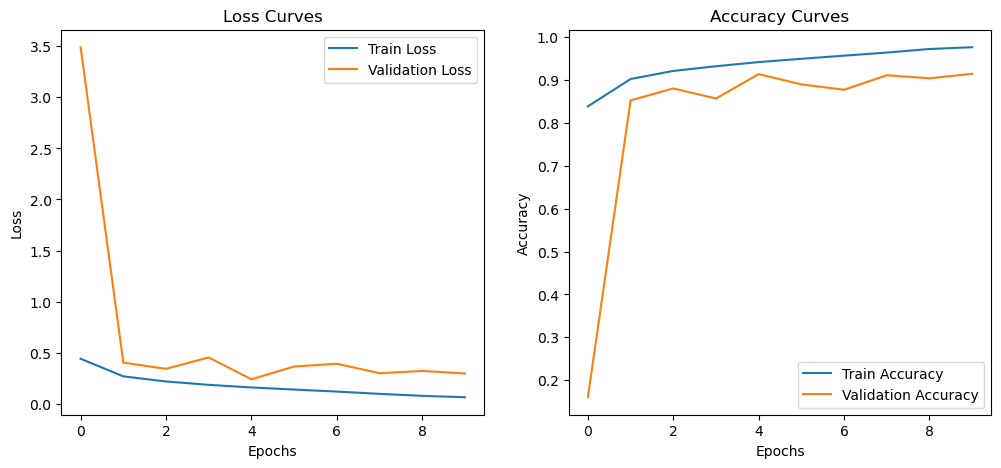

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Conv2D, BatchNormalization, ReLU, Add, GlobalAveragePooling2D,
                                     Dense, Input, Reshape, Multiply)

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to categorical one-hot encoding
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

# Squeeze-and-Excitation Block
def se_block(x, filters, ratio=16):
    se = GlobalAveragePooling2D()(x)  # Squeeze (Global pooling)
    se = Dense(filters // ratio, activation='relu')(se)  # Excitation (Bottleneck FC layer)
    se = Dense(filters, activation='sigmoid')(se)  # Scaling factor
    se = Reshape((1, 1, filters))(se)  # Reshape to match input
    x = Multiply()([x, se])  # Scale input feature maps
    return x

# Residual Block with SE Block
def se_residual_block(x, filters, downsample=False):
    shortcut = x  # Save input for residual connection

    # First Conv Layer
    x = Conv2D(filters, (3, 3), padding='same', strides=(2 if downsample else 1), activation=None)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Second Conv Layer
    x = Conv2D(filters, (3, 3), padding='same', activation=None)(x)
    x = BatchNormalization()(x)

    # Squeeze-and-Excitation Block
    x = se_block(x, filters)

    # Adjust shortcut connection when downsampling or changing filter size
    if downsample or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=(2 if downsample else 1), padding='same', activation=None)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Add shortcut connection
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

# Define the SENet architecture
def SENet():
    input_layer = Input(shape=(28, 28, 1))

    x = Conv2D(64, (3, 3), padding='same', activation=None)(input_layer)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Adding SE Residual Blocks with Downsampling
    x = se_residual_block(x, 64)
    x = se_residual_block(x, 64)

    x = se_residual_block(x, 128, downsample=True)
    x = se_residual_block(x, 128)

    x = se_residual_block(x, 256, downsample=True)
    x = se_residual_block(x, 256)

    # Global Average Pooling instead of Flattening
    x = GlobalAveragePooling2D()(x)
    x = Dense(10, activation='softmax')(x)  # Output layer (10 classes)

    model = Model(input_layer, x)
    return model

# Compile the model
model = SENet()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels_cat, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
predictions = model.predict(test_images)
pred_labels = predictions.argmax(axis=1)

# Calculate additional metrics
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
precision = precision_score(test_labels, pred_labels, average='macro')
recall = recall_score(test_labels, pred_labels, average='macro')
f1 = f1_score(test_labels, pred_labels, average='macro')

# Print the classification report
print("Classification Report:")
print(classification_report(test_labels, pred_labels))


# Plot the loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()
